<a href="https://colab.research.google.com/github/Albirizzu/oDCM_team8/blob/main/BoxOfficeMojo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Box Office Mojo

The goal of this notebook is to scrape data from https://www.boxofficemojo.com/. Box Office Mojo is a website, founded in 1998, that tracks boxoffice revenue.  Specifically, this notebook will show how to scrape data from the Worldwide Boxoffice ranking, showing the 200 movies with the highest gross each year.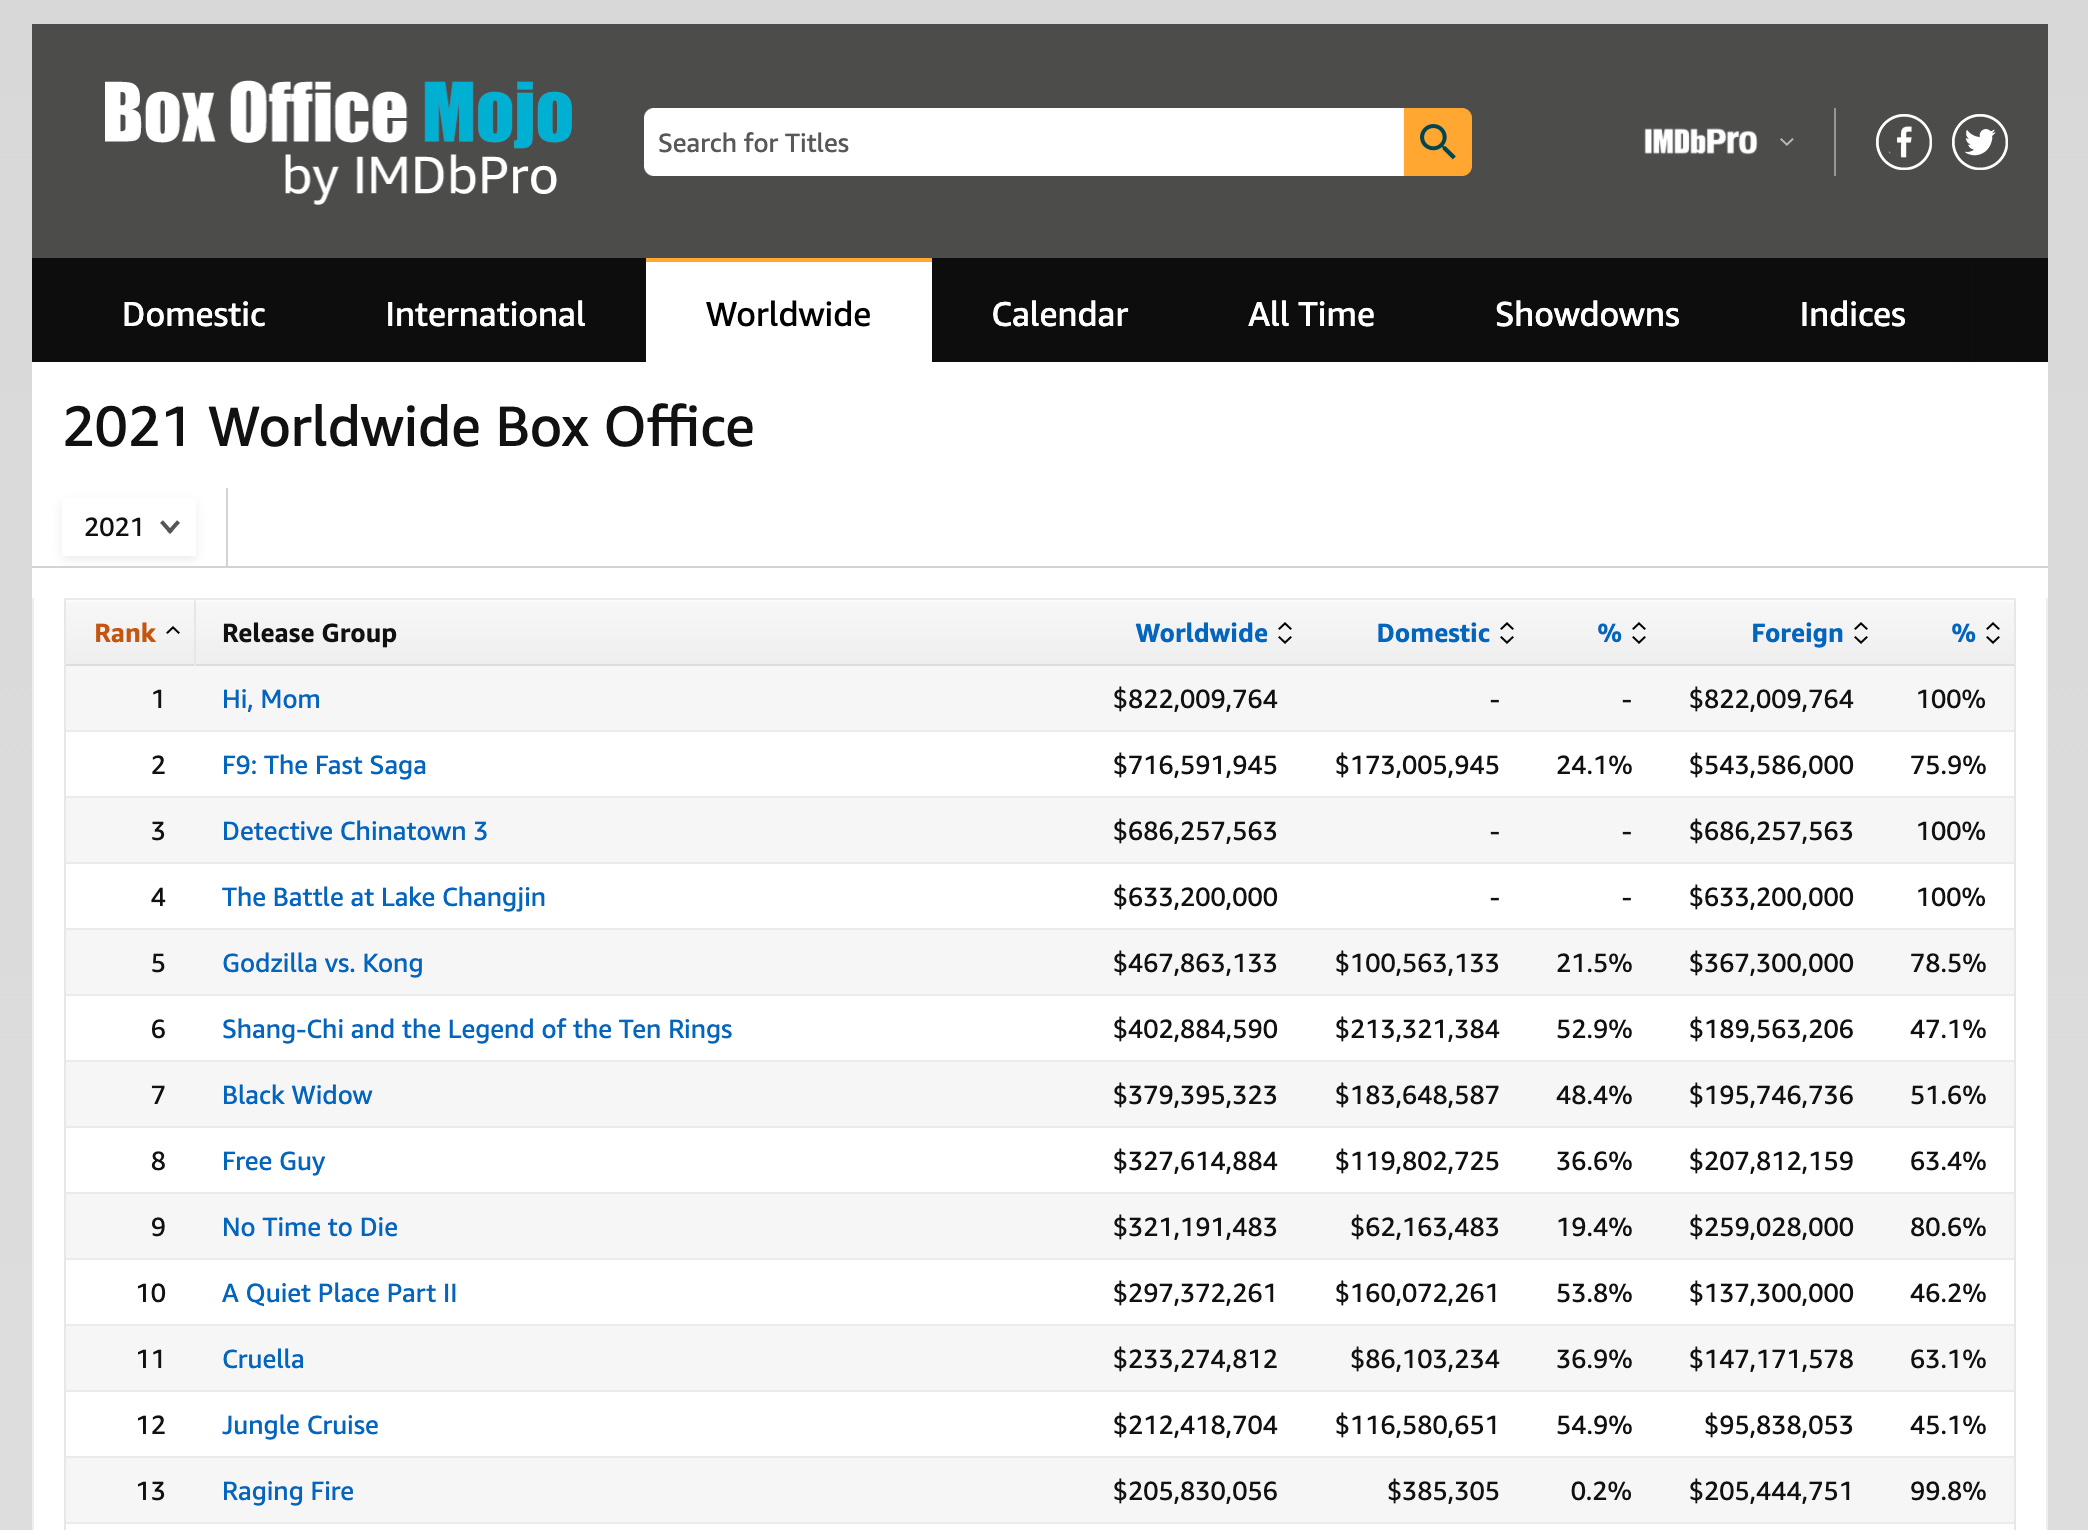

We must first create a list containing multiple URL's to navigate through the years of interest. We create a counter to add the year to the base URL.

In [1]:
#Create a base-url
base_url = "https://www.boxofficemojo.com/year/world/"

#Create an empty list to store the URLs of all years of interest
page_urls = []

#Add a counter to the base-url and store the newly create full-url in the page-url dictionary
for counter in range(2015, 2022):
    full_url = base_url + str(counter) + "/" 
    page_urls.append(full_url)

Now, we will parse through data from each of the previously obtained URL's. We will do so using the BeautifulSoup package. We will extract the relevant data from the soup. To do so, we will first select the table. Next, we will find all items (within td-tags) in each row (within tr-tag). The extracted data will be added to the rows dictionary. 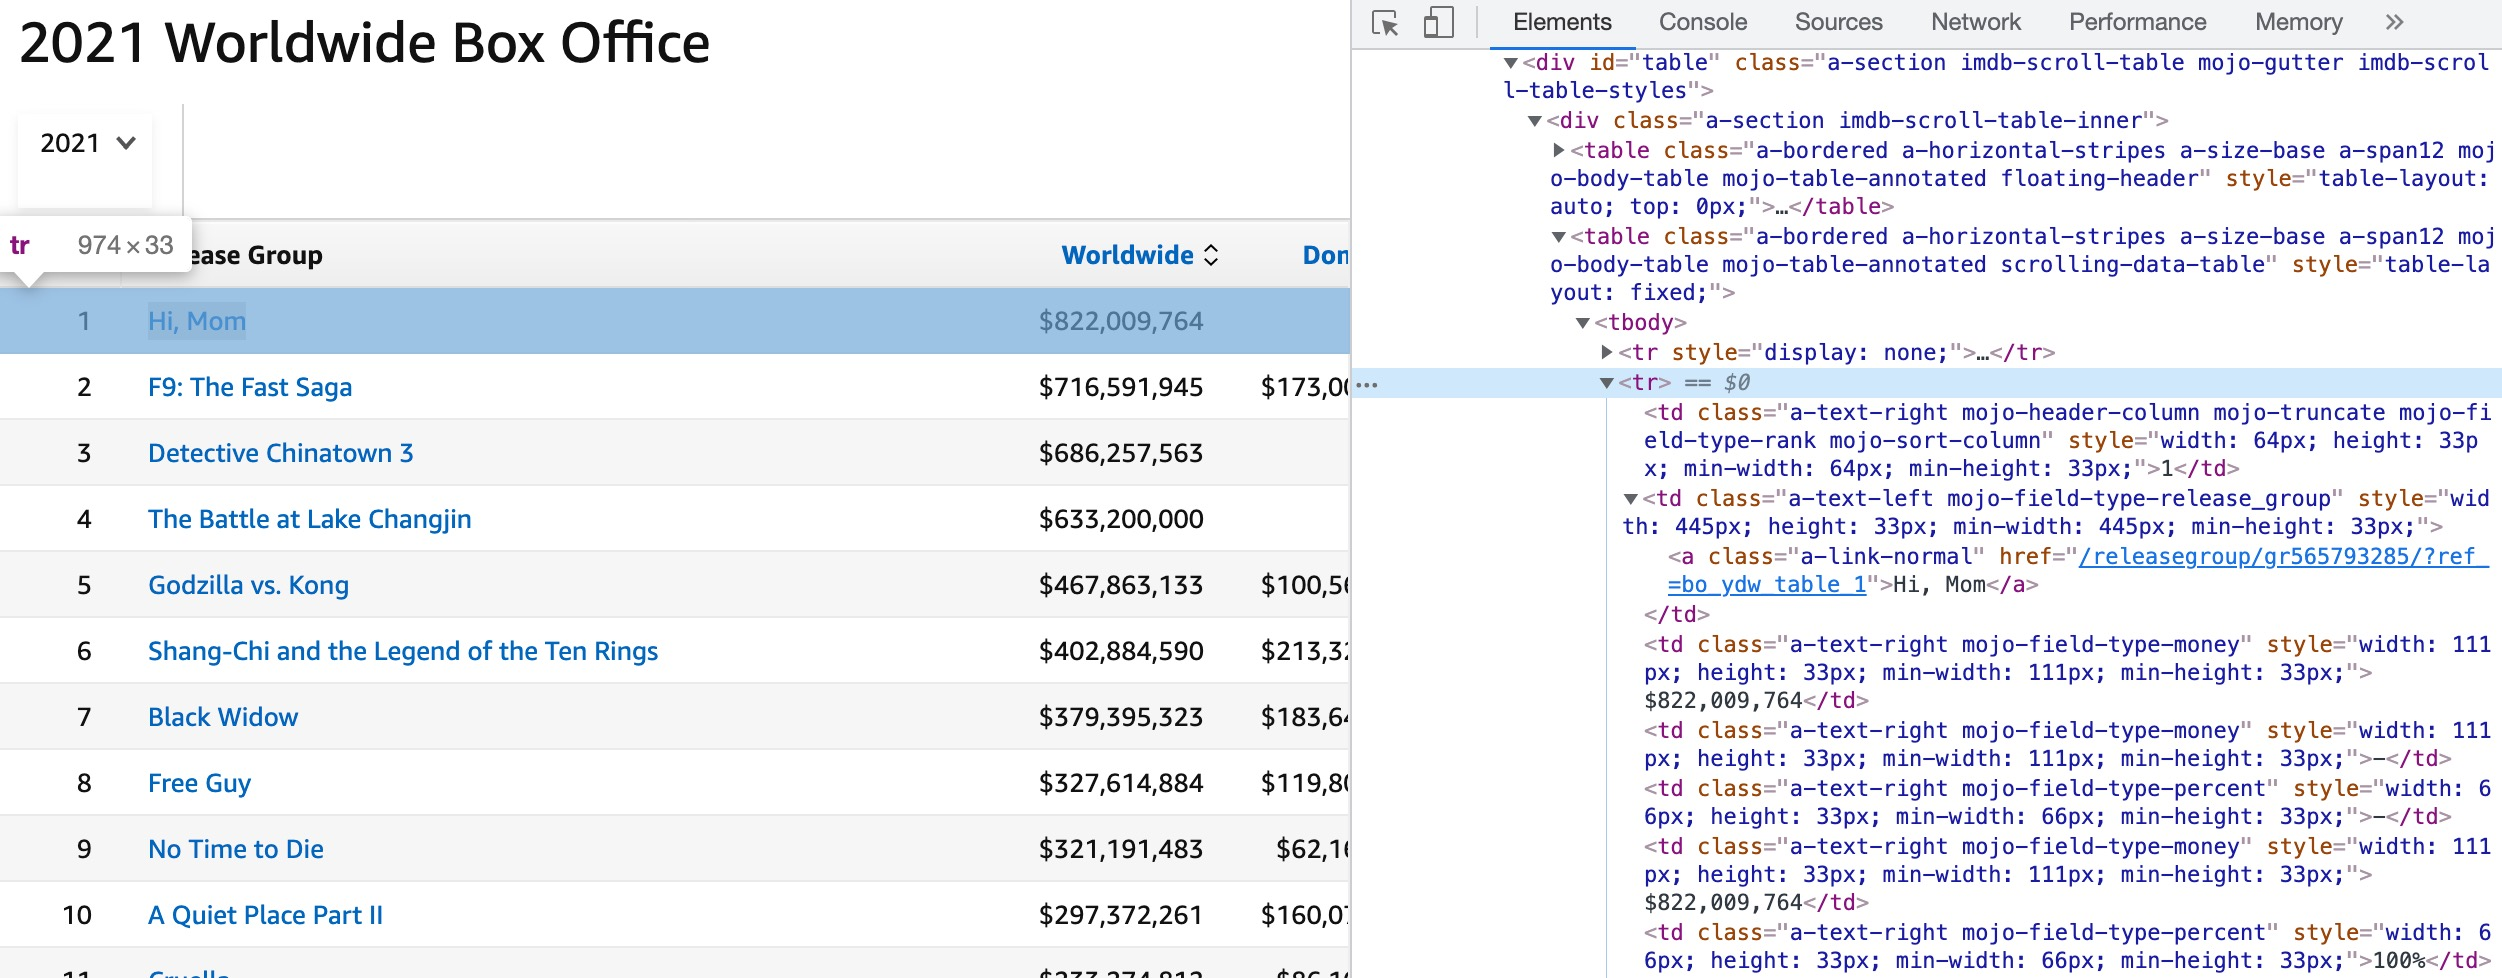

In [ ]:
#Import packages
from bs4 import BeautifulSoup as BS
import requests
from requests import get
import time
import logging

#Log data extraction Box office
logging.basicConfig(filename = 'myapp.log.rtf', format='%(asctime)s %(message)s')
logging.warning('log data extraction Box Office Mojo')

#Define function
def extract_data(page_urls):
  rows = []
#Create a new counter to add year to Box Office data
  new_counter = 2014
#Create a for-loop and parse through the URL's in the page_urls list
  for page_url in page_urls: 
    new_counter +=1 
    res = requests.get(page_url)
    soup = BS(res.content, "html.parser")
#Find all items in Box Office Mojo table
    table = soup.find_all('table', class_ ='a-section imdb-scroll-table mojo-gutter imdb-scroll-table-styles')
    for tr in soup.find('table'):
        td = tr.find_all('td')
        row = [tr.text.strip() for tr in td if tr.text.strip()]
        if row:
          row.append(new_counter)
        if row:
          rows.append(row)
#Use time.sleep function to avoid overloading the server with requests  
    time.sleep(2)
  return (rows)
extract_data(page_urls)

We will use the extracted data to create a dataframe. 

In [ ]:
#Import packages
import pandas as pd

#Create boxofficemojo dataframe
Boxoffice_Movies = pd.DataFrame(extract_data(page_urls), columns=["Rank", "Movie", "Worldwide($)", "US($)","%-US", "Foreign($)", "%-Foreign", "Year"])
print(Boxoffice_Movies)

Change datatype of the 'Rank'-column to integer

In [ ]:
Boxoffice_Movies= Boxoffice_Movies["Rank"].astype(str).astype(int)

Lastly, we use google drive to export the dataframe as a CSV-file

In [ ]:
from google.colab import drive
drive.mount('drive')

In [8]:
Boxoffice_Movies.to_csv('BoxOfficeMojo.csv', index=False)
!cp BoxOfficeMojo.csv "drive/My Drive/"

cp: cannot create regular file 'drive/My Drive/': No such file or directory
